##    libs initialization

In [4]:
import gym
import numpy as np
from IPython.display import display, clear_output
import time
import matplotlib.pyplot as plt

##    environment initialization

In [5]:
env = gym.make('Taxi-v3')

In [25]:
def getScore(table):
    score = 0
    env_s = gym.make('Taxi-v3')
    state = env_s.reset()
    for step in range(steps):
        action = np.argmax(table[state,:])

        new_state, reward, isDone, _ = env_s.step(action)

        state = new_state
        score += reward
        if isDone == True:
            break
    return score
    

##    Q-table initialization

In [6]:
action_size = env.action_space.n
state_size = env.observation_space.n
q_table = np.zeros((state_size, action_size))

## Q-Learning procedure

In [48]:
exploration_rate = 1

learning_rate = 0.6
discount_rate = 0.6

decay_rate = 0.01

steps = 100
episodes = 10

results = []
start_time = time.time()
for episode in range(episodes):
    state = env.reset()
    for step in range(steps):
        if np.random.random() < exploration_rate:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state,:])
            
        new_state, reward, isDone, _ = env.step(action)
        
        #bellman equation
        q_table[state, action] = q_table[state, action] + learning_rate * (reward + discount_rate * 
                                                        np.max(q_table[new_state,:]) - q_table[state,action])
        
        state = new_state
        if isDone == True:
            break
    results.append(getScore(q_table))
    
    exploration_rate = exploration_rate - 0.001*np.exp(-decay_rate*episode)

print("Execution time: {0} seconds".format(time.time() - start_time))


Execution time: 0.31898951530456543 seconds


## Q-table evaluation

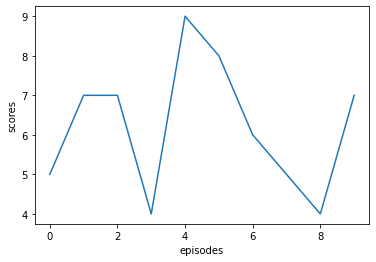

In [50]:
plt.plot(results)
plt.xlabel("episodes")
plt.ylabel("scores")
plt.show()

In [20]:
for episode in range(10):
    state = env.reset()
    for step in range(steps):
        action = np.argmax(q_table[state,:])

        new_state, reward, isDone, _ = env.step(action)

        if isDone == True:
            break

        state = new_state

        clear_output()
        display(env.render())
        time.sleep(0.7)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


None

KeyboardInterrupt: 

## SARSA-table initialization

In [9]:
action_size = env.action_space.n
state_size = env.observation_space.n
sarsa_table = np.zeros((state_size, action_size))

## SARSA-learning procedure

In [51]:
exploration_rate = 1

learning_rate = 0.6
discount_rate = 0.6

decay_rate = 0.01

steps = 100
episodes = 10

results_sars = []
start_time = time.time()
for episode in range(episodes):
    state = env.reset()
    for step in range(steps):
        #a
        if np.random.random() < exploration_rate:
            action = env.action_space.sample()
            
        new_state, reward, isDone, _ = env.step(action)
        
        #a'
        new_action = np.argmax(sarsa_table[new_state,:])
        
        #bellman equation but target policy is always same as Behavior policy
        sarsa_table[state, action] = sarsa_table[state, action] + learning_rate * (reward + discount_rate * sarsa_table[new_state,new_action] - sarsa_table[state,action])
        
        state = new_state
        action = new_action
        if isDone == True:
            break
    results_sars.append(getScore(sarsa_table))
    
    exploration_rate = exploration_rate - 0.001*np.exp(-decay_rate*episode)

print("Execution time: {0} seconds".format(time.time() - start_time))

Execution time: 0.0818018913269043 seconds


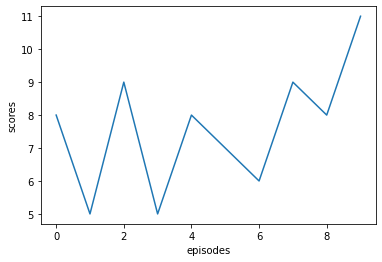

In [52]:
plt.plot(results_sars)
plt.xlabel("episodes")
plt.ylabel("scores")
plt.show()

## SARSA evaluation

In [30]:
state = env.reset()
for step in range(steps):
    action = np.argmax(sarsa_table[state,:])

    new_state, reward, isDone, _ = env.step(action)

    state = new_state
    
    clear_output()
    display(env.render())
    time.sleep(0.7)
    if isDone == True:
        break

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


None

## Double Q-Learning table initialization 

In [34]:
action_size = env.action_space.n
state_size = env.observation_space.n
dq_table1 = np.zeros((state_size, action_size))
dq_table2 = np.zeros((state_size, action_size))

## Double Q-Learning procedure

In [53]:
exploration_rate = 1

learning_rate = 0.6
discount_rate = 0.6

decay_rate = 0.01

steps = 100
episodes = 10

results_dq1 = []
results_dq2 = []
start_time = time.time()
for episode in range(episodes):
    state = env.reset()
    for step in range(steps):
        table = 1 if np.random.random() > 0.5 else 2
        if table == 1:
            #a
            if np.random.random() < exploration_rate:
                action = env.action_space.sample()
            else:
                action = np.argmax(dq_table1[state,:])
            new_state, reward, isDone, _ = env.step(action)
            #a'
            new_action = np.argmax(dq_table1[new_state,:])
            
            dq_table1[state, action] = dq_table1[state, action] + learning_rate * (reward + discount_rate * 
                                                        dq_table2[new_state,new_action] - dq_table1[state,action])
        elif table == 2:
            #a
            if np.random.random() < exploration_rate:
                action = env.action_space.sample()
            else:
                action = np.argmax(dq_table2[state,:])
            new_state, reward, isDone, _ = env.step(action)
            #a'
            new_action = np.argmax(dq_table2[new_state,:])
            
            dq_table2[state, action] = dq_table2[state, action] + learning_rate * (reward + discount_rate * 
                                                        dq_table1[new_state,new_action] - dq_table2[state,action])

        state = new_state
        if isDone == True:
            break
    results_dq1.append(getScore(dq_table1))
    results_dq2.append(getScore(dq_table2))
    
    exploration_rate = exploration_rate - 0.001*np.exp(-decay_rate*episode)
print("Execution time: {0} seconds".format(time.time() - start_time))

Execution time: 0.16417765617370605 seconds


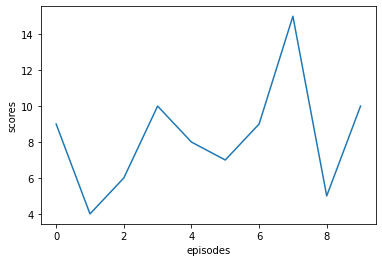

In [54]:
plt.plot(results_dq1)
plt.xlabel("episodes")
plt.ylabel("scores")
plt.show()

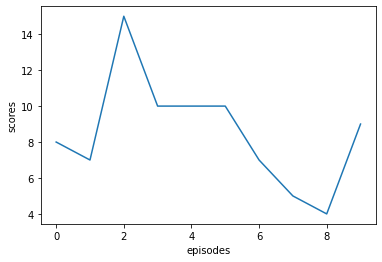

In [55]:
plt.plot(results_dq2)
plt.xlabel("episodes")
plt.ylabel("scores")
plt.show()